# Análise Exploratória de Dados - Doenças Cardiovasculares

Doenças cardiovasculares são uma classe contendo diferentes tipos de doenças que afetam de alguma maneira o coração ou os vasos sanguíneos. Dentro da classe, existem várias doenças comoangina de peito, cardiopatia, arritmia cardíaca e aneurisma da aorta.

<center><img src="https://raw.githubusercontent.com/carlosfab/curso_data_science_na_pratica/master/modulo_03/396260-PCIO15-306.jpg"></center>

Apesar de ser uma das principais causas de morte em todo o mundo, estima-se que cerca de 90% das doenças cardiovasculares poderiam ser evitadas por meio da adoção de algumas medidas e mudanças no *lifestyle*.

Existem hoje várias pesquisas na área de *Machine Learning* visando a construções de modelos preditivos que ajudem os médicos a descobrirem doenças cardiovasculares em seus pacientes.

Estudos publicados na revista *na revista Nature Biomedical Engineering* mostram que algoritmos de *Deep Learning* foram capazes de antecipar doenças cardíacas em até 5 anos.

Definitivamente, o uso de Inteligência Artificial tem impactado profundamente a área da saúde, e tem proporcionado aos profissionais médicos insumos de inteligência cada vez mais precisos.



## Obtenção dos Dados

O conjunto principal de dados usado neste projeto foi coletado da ***Cleveland Clinic Foundation*** e se encontra disponível no conhecido [Repositório UCI *Machine Learning*](https://archive.ics.uci.edu/ml/datasets/heart+Disease). Ressalta-se que os nomes, identidade e documentos pessoais dos pacientes foram removidos completamente do banco de dados.

O *dataset* processado contém dados de 303 pessoas e 76 atributos. Entretanto, os principais artigos e estudos publicados optaram por usar apenas 14 atributos, considerados de maior relevância. Da mesma maneira, este projeto de *Data Science* usará essas mesmas 14 variáveis principais.

<p><img alt="Colaboratory logo" height="100" src="https://raw.githubusercontent.com/carlosfab/curso_data_science_na_pratica/master/modulo_03/Large45.jpg" align="right" hspace="20px" vspace="0px"></p>

* O arquivo `csv` com os dados de 303 pessoas e 14 atributos pode ser baixado [neste link](https://raw.githubusercontent.com/carlosfab/curso_data_science_na_pratica/master/modulo_03/heart-disease-uci.csv).

* O arquivo contendo todos os detalhes e documentação do *dataset* usado neste projeto se encontra [neste link](https://github.com/carlosfab/curso_data_science_na_pratica/blob/master/modulo_03/heart-disease.names).

* Há ainda um *dataset* secundário que será utilizado para ver a evolução no número de mortes por doenças cardiovasculares no Brasil (entre os anos de 2004-2017). Esses dados foram disponibilizados pela [Sociedade Brasileira de Cardiologia](http://www.cardiometro.com.br/anteriores.asp), e podem ser baixados [neste link](https://raw.githubusercontent.com/carlosfab/curso_data_science_na_pratica/master/modulo_03/mortes_doencas_cardiovasculares.csv).



### Informações sobre os atributos:


* `age` - idade em anos
* `sex` - sexo do paciente
  * 0: mulher
  * 1: homem
* `cp` - tipo da dor torácica
  * 1: angina típica
  * 2: angina atípica
  * 3: dor não cardíaca
  * 4: assintomática
* `trestbps` - pressão arterial em repouso
* `chol` - colesterol sérico (*mg/dl*)
* `fbs` - açucar no sangue em jejum > 120*mg/dl*
  * 0: `False`
  * 1: `True`
* `restecg` - resultado do eletrocardiografia de repouso
  * 0: normal
  * 1: anormalidades de ST-T  (inversão da onda T e elevação ou depressão de > 0.05*mV*)
  * 2: hipertrofia ventricular esquerda provável ou definitiva (pelos critérios de Romhilt-Estes)
* `thalach` - frequência cardíaca máxima atingida
* `exang` - angina induzida pelo exercício
  * 0: não
  * 1: sim
* `oldpeak` - depessão do segmento ST induzida pelo exercício em relação ao repouso
* `slope` - inclinação do segmento ST no pico do exercício
* `ca` - número de vasos principais colorido por fluoroscopia
* `thal` - *thallium stress test*
  * 3: normal
  * 6: defeito fixo
  * 7: defeito reversível
* `num` - diagnóstico de doença cardíaca (diagnóstico angiográfico)
  * 0: não há doença cardíaca ( < 50% de estreitamento do diâmetro)
  * 1,2,3,4: há doença cardíaca ( > 50% de estreitamento do diâmetro)

### Importar os Dados

Em uma etapa inicial, importaremos os dois *datasets* mencionados no início do *notebook*:

* Um contendo os dados relacionados às doenças cardiovasculares (303 pessoas e 14 atributos); e
* Um contendo os dados da mortalidade no Brasil por doenças cardiovasculares.

In [44]:
# importar as bibliotecas necessárias
import pandas as pd
import matplotlib.pyplot as plt
import math

# url dos datasets
dataset_uci = "https://raw.githubusercontent.com/carlosfab/curso_data_science_na_pratica/master/modulo_03/heart-disease-uci.csv"
dataset_brasil = "https://raw.githubusercontent.com/carlosfab/curso_data_science_na_pratica/master/modulo_03/mortes_doencas_cardiovasculares.csv"

# importar dataset da UCI
df = pd.read_csv(dataset_uci)

# importar dataset dos indíces do Brasil
df_brasil = pd.read_csv(dataset_brasil)

Olhando acima as informações sobre os atributos, percebemos que nossa variável alvo (`num`) possui cinco valores possíveis: \[0, 1, 2, 3, 4\].

No entanto, seguindo a maioria das pesquisas que utilizaram esse *dataset*, iremos considerar apenas duas situações possíveis:

* **0** - não há doença cardíaca
* **1** - há doença cardíaca

Então, iremos igualar a 1 os valores compreendidos entre 1-4.

In [45]:
# variável alvo antes
df.num.value_counts()

0    164
1     55
2     36
3     35
4     13
Name: num, dtype: int64

In [46]:
# converter valores >= 1 em 1
df.loc[df.num != 0, 'num'] = 1

In [47]:
# variável alvo depois
df.num.value_counts()

0    164
1    139
Name: num, dtype: int64

## SUA ANÁLISE EXPLORATÓRIA DE DADOS

* Ver o tamanho do df (shape)
* Ver a descrição estatística do df (describe)
* Ver os tipos das variáveis do df (dtypes)
* Ver as 5 primeiras entradas do df (head)
* Contar quantos valores "não há doença cardíaca" (0) e "há doença cardíaca" (1) existem no *dataset* (value_counts)
* Ver valores ausentes do df (isnull().sum())
* Plotar o gráfico de linha para df_brasil
* Plotar o gráfico de barras para ver a quantidade de homens e mulheres em df
* Plotar o gráfico de dispersão para as variáveis `age` e `chol`
* plotar um histograma para o colesterol sérico
* plotar um gráfico de pizza para `restecg`
* Plotar um *heatmap* com as correlações
* Qualquer outra análise que você quiser.

NÃO escreve apenas código. Um projeto ou relatório é para fornecer insumos e informações para alguém. SEMPRE documente, escreva e formule suas hipóteses. Você NÃO está escrevendo para outro programador ler. Você está preparando um relatório para os Diretores de nível estratégico de uma empresa.


In [48]:
#Ver o tamanho do df
df.shape

(303, 14)

In [49]:
#Ver resumo estatistico 
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.438944,0.679868,3.158416,131.689769,246.693069,0.148515,0.990099,149.607261,0.326733,1.039604,1.600660,0.663366,4.722772,0.458746
std,9.038662,0.467299,0.960126,17.599748,51.776918,0.356198,0.994971,22.875003,0.469794,1.161075,0.616226,0.934375,1.938383,0.499120
min,29.000000,0.000000,1.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,1.000000,0.000000,3.000000,0.000000
25%,48.000000,0.000000,3.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,3.000000,0.000000
50%,56.000000,1.000000,3.000000,130.000000,241.000000,0.000000,1.000000,153.000000,0.000000,0.800000,2.000000,0.000000,3.000000,0.000000
75%,61.000000,1.000000,4.000000,140.000000,275.000000,0.000000,2.000000,166.000000,1.000000,1.600000,2.000000,1.000000,7.000000,1.000000
max,77.000000,1.000000,4.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,3.000000,3.000000,7.000000,1.000000


In [50]:
#Ver o tipo das variaveis do DF
df.dtypes

age         float64
sex         float64
cp          float64
trestbps    float64
chol        float64
fbs         float64
restecg     float64
thalach     float64
exang       float64
oldpeak     float64
slope       float64
ca          float64
thal        float64
num           int64
dtype: object

In [51]:
#Ver as 5  primeiras entradas
df.head(20)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,1
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0
5,56.0,1.0,2.0,120.0,236.0,0.0,0.0,178.0,0.0,0.8,1.0,0.0,3.0,0
6,62.0,0.0,4.0,140.0,268.0,0.0,2.0,160.0,0.0,3.6,3.0,2.0,3.0,1
7,57.0,0.0,4.0,120.0,354.0,0.0,0.0,163.0,1.0,0.6,1.0,0.0,3.0,0
8,63.0,1.0,4.0,130.0,254.0,0.0,2.0,147.0,0.0,1.4,2.0,1.0,7.0,1
9,53.0,1.0,4.0,140.0,203.0,1.0,2.0,155.0,1.0,3.1,3.0,0.0,7.0,1


In [52]:
#Contar quantos valores não há doenças cardiacas
d=(df.num.value_counts()/df.shape[0])*100
print("Pessoas que tiveram doenças Cardiovasculares corresponde a {}% da amostragem".format(math.trunc(d[1])))
print("Pessoas que NÃO tiveram doenças Cardiovasculares corresponde a {}% da amostragem".format(math.trunc(d[0])))

Pessoas que tiveram doenças Cardiovasculares corresponde a 45% da amostragem
Pessoas que NÃO tiveram doenças Cardiovasculares corresponde a 54% da amostragem


In [53]:
#ver valores ausentes do df
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
num         0
dtype: int64

Podemos notar que não tem valores ausentes

In [54]:
df_brasil.head()

,ano,mortes_doencas_cardio
0,2017,383.961
1,2016,362.091
2,2015,349.584
3,2014,340.284
4,2013,339.672


Text(0.5, 1.0, 'Mortalidade por doenças cardiovasculares no Brasil')

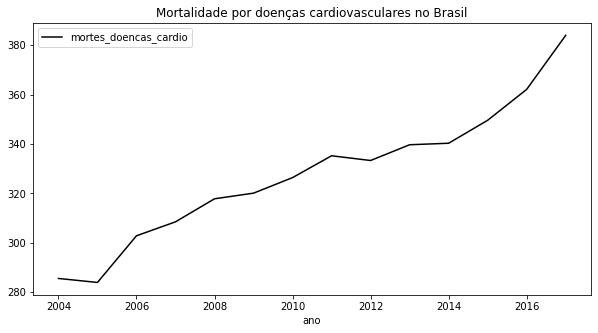

In [55]:
#Plotar graficos da mortalidade por doenças cardiovasculares no Brasil
df_brasil = pd.read_csv(dataset_brasil,index_col="ano", parse_dates=False)
Fig, ax = plt.subplots (figsize=(10,5),)

df_brasil.plot(kind="line", ax=ax, color= 'black')
ax.set_title('Mortalidade por doenças cardiovasculares no Brasil')

In [56]:
au=df_brasil.loc[2007]/df_brasil.loc[2017]
print("Teve um aumento de numero de casos de morte no perido de 10 anos em {}%".format(au))

Teve um aumento de numero de casos de morte no perido de 10 anos em mortes_doencas_cardio    0.803378
dtype: float64%


Observa-se que há um aumento de morte de pessoas no Brasil por doenças cardiovasculares e em 10 anos o numero quase que dobrou.

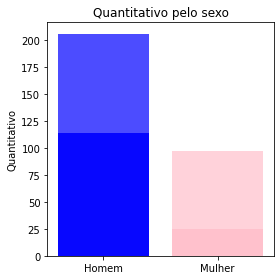

In [57]:
#Quantitativo pelo sexo do df
import numpy as np
hom = np.where((df['sex']==1) & (df['num'] == 1))
hom = len(sum(hom))
mul = np.where((df['sex']==0) & (df['num'] == 1))
mul = len(sum(mul))
ar=(hom,mul)
fig, ax = plt.subplots(figsize=(4,4))
leg=("Homem","Mulher")
colors=("blue","pink")
ax.bar(leg,df.sex.value_counts(), alpha=0.7, color=colors)
ax.bar(leg,ar, alpha=0.9, color=colors)
ax.set_title('Quantitativo pelo sexo')
ax.set_ylabel('Quantitativo')
plt.tight_layout()

Pode-se ver nesse grafico a quantidade de homens e de mulheres que participaram da pesquisa, a barra mais forte significa quantidades de pessoas que tiveram doenças cardiovasculares comparando com o sexo.

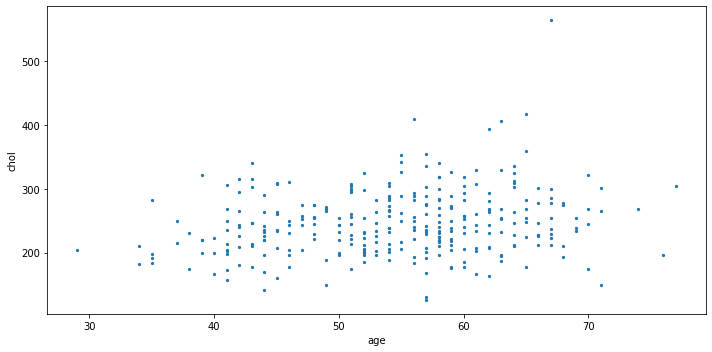

In [58]:

#Grafico de dispeção comparando idade e colesterol sério
Fig, ax=plt.subplots(figsize=(10,5))

df.plot.scatter(x='age', y='chol', ax=ax, s=5)

plt.tight_layout()



Pode-se inferir que com o aumento da idade a um aumento do desvio do nivel ideal que é entre 200 e 239 mg/dL




/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


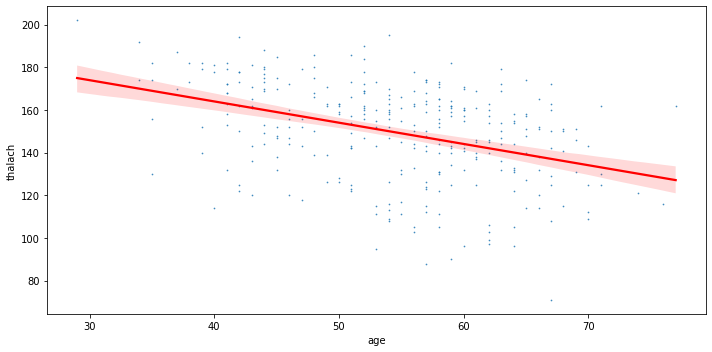

In [59]:
#Grafico de dispeção comparando idade e frequencia cardiaca maxima 
import seaborn as sns
Fig, ax=plt.subplots(figsize=(10,5))

ax.set_xlim(auto=True)
sns.regplot('age', 'thalach', scatter_kws={"s": 0.5},
            line_kws={"color": "red"}, data=df, ax=ax)

plt.tight_layout()

Com o aumento da idade observa-se uma diminuição da frequência cardiaca máxima

[233.0, 286.0, 229.0, 250.0, 204.0, 236.0, 268.0, 354.0, 254.0, 203.0, 192.0, 294.0, 256.0, 263.0, 199.0, 168.0, 229.0, 239.0, 275.0, 266.0, 211.0, 283.0, 284.0, 224.0, 206.0, 219.0, 340.0, 226.0, 247.0, 167.0, 239.0, 230.0, 335.0, 234.0, 233.0, 226.0, 177.0, 276.0, 353.0, 243.0, 225.0, 199.0, 302.0, 212.0, 330.0, 230.0, 175.0, 243.0, 197.0, 198.0, 177.0, 290.0, 219.0, 253.0, 266.0, 233.0, 172.0, 273.0, 213.0, 305.0, 177.0, 216.0, 304.0, 188.0, 282.0, 185.0, 232.0, 326.0, 231.0, 269.0, 254.0, 267.0, 248.0, 197.0, 360.0, 258.0, 308.0, 245.0, 270.0, 208.0, 264.0, 321.0, 274.0, 325.0, 235.0, 257.0, 216.0, 234.0, 256.0, 302.0, 164.0, 231.0, 141.0, 252.0, 255.0, 239.0, 258.0, 201.0, 222.0, 260.0, 182.0, 303.0, 265.0, 188.0, 309.0, 177.0, 229.0, 260.0, 219.0, 307.0, 249.0, 186.0, 341.0, 263.0, 203.0, 211.0, 183.0, 330.0, 254.0, 256.0, 222.0, 217.0, 282.0, 234.0, 288.0, 239.0, 220.0, 209.0, 258.0, 227.0, 204.0, 261.0, 213.0, 250.0, 174.0, 281.0, 198.0, 245.0, 221.0, 288.0, 205.0, 309.0, 240.0

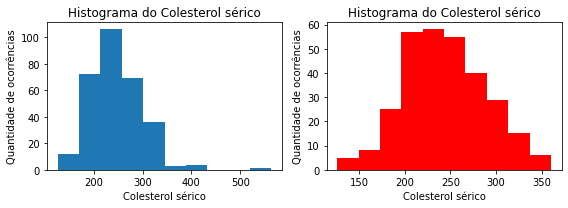

In [60]:
#Tirar OUTLIERS
Q1=np.percentile(df.chol,25)
Q3=np.percentile(df.chol,75)
IIQ=Q3-Q1
C=1.5
LS=Q3+C*IIQ
LI=Q1-C*IIQ
df_chol_semOut=[]
Outliers=[]
for t in df.chol:
    if t>LS or t<LI:
      Outliers.append(t)
    else:
      df_chol_semOut.append(t)


print(df_chol_semOut)
# plotar o histograma do Colesterol sérico
fig, (ax,ax2) = plt.subplots(nrows=1, ncols=2, figsize=(8,3))

plt.hist(df_chol_semOut, color='red')
ax2.set_title("Histograma do Colesterol sérico")
ax2.set_ylabel("Quantidade de ocorrências")
ax2.set_xlabel("Colesterol sérico")

df.chol.plot(kind="hist", ax=ax)
ax.set_title("Histograma do Colesterol sérico")
ax.set_ylabel("Quantidade de ocorrências")
ax.set_xlabel("Colesterol sérico")

plt.tight_layout()

Sem os outliers é possível ver uma melhor representação do histograma

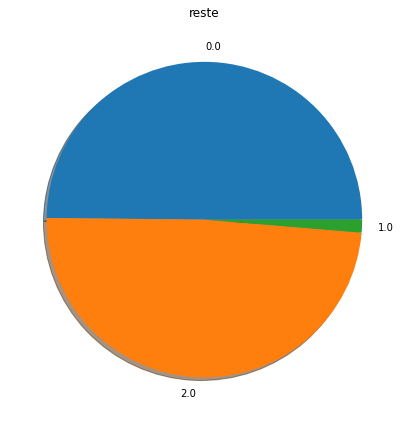

In [61]:
# extrair as ocorrências para um dicionário
ocorrencia_classificacao = dict(df.restecg.value_counts())

# preparar dados para o pie chart
labels = ocorrencia_classificacao.keys()
sizes = ocorrencia_classificacao.values()


# plotar o gráfico de pizza do Resultado da eletrocardiografia de repouso
Fig, ax = plt.subplots(figsize=(6,6))

ax.pie(sizes, labels=labels, shadow=True)
ax.set_title("reste")

plt.tight_layout()

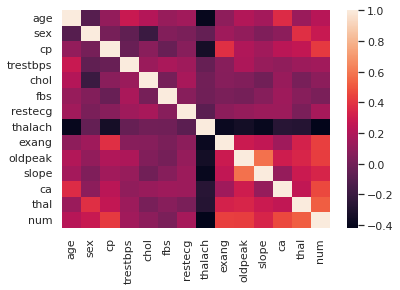

In [62]:
# importar seaborn
import seaborn as sns
sns.set()
# heatmap (mapa de calor)
sns.heatmap(df.corr())
plt.show()

Com esse recursos é possivel observar as correlações entre as variáveis